In [11]:
# Importing standard Qiskit libraries
from qiskit import *
from matplotlib import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# from ibm_quantum_widgets import *
from qiskit_aer import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
# from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
# service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive inside a session. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# with Session(backend=service.backend("ibmq_qasm_simulator")):
#     result = Sampler().run(circuits).result()

In [12]:
# Little test of circuits

# Let's initialize a small 4 qubit <-> 4 bit system
qubits = QuantumRegister(4)
classical = ClassicalRegister(4)

# Let's then create out Quantum Circuit
qc = QuantumCircuit(qubits, classical, name="Test Circuit")

qc.draw()

q8_0: 
      
q8_1: 
      
q8_2: 
      
q8_3: 
      
c4: 4/

In [13]:
# Let's try and create a function that builds a simple Quantum Circuit (Without measuring)
def build_circuit(qubits: int, bits: int = 0, name: str = "", measure_all: bool = False) -> QuantumCircuit:
    # Initialize the qubits and bits registers
    qubits_reg = QuantumRegister(qubits)
    
    classical_reg = ClassicalRegister(bits) if bits else ClassicalRegister(qubits)

    # Generate the circuit
    circuit = QuantumCircuit(qubits_reg, classical_reg, name=name)

    if measure_all:
        circuit.measure_all()
    return circuit

## Setting up our circuit
We want to make a simple 4 qubit quantum circuit in which we apply the following gates to each qubit:

- **Qubit 0**: Hadamard gate.
- **Qubit 1**: X gate followed by Hadamard.
- **Qubit 2**: Z gate followed by Hadamard.
- **Qubit 3**: Y gate followed by Hadamard.

I want to observe the changes in each qubit state as they locate themselves in different corners of the block sphere

In [22]:
new_qc = build_circuit(4)
new_qc.h(0)
new_qc.x(1)
new_qc.h(1)
new_qc.z(2)
new_qc.h(2)
new_qc.y(3)
new_qc.h(3)
# visualize_transition(new_qc, trace=True)
for i in range(4):
    new_qc.measure(i,i)

### Attempt to visualize transitions in each Qubit
- Use the visualization tool.

In [23]:
new_qc.draw()

┌───┐     ┌─┐         
q19_0: ┤ H ├─────┤M├─────────
       ├───┤┌───┐└╥┘┌─┐      
q19_1: ┤ X ├┤ H ├─╫─┤M├──────
       ├───┤├───┤ ║ └╥┘┌─┐   
q19_2: ┤ Z ├┤ H ├─╫──╫─┤M├───
       ├───┤├───┤ ║  ║ └╥┘┌─┐
q19_3: ┤ Y ├┤ H ├─╫──╫──╫─┤M├
       └───┘└───┘ ║  ║  ║ └╥┘
 c7: 4/═══════════╩══╩══╩══╩═
                  0  1  2  3

{'1100': 648, '1011': 606, '1010': 648, '1111': 616, '0001': 655, '0100': 604, '0111': 594, '0011': 659, '1101': 614, '1000': 573, '0110': 600, '0000': 661, '0010': 613, '1001': 623, '0101': 643, '1110': 643}


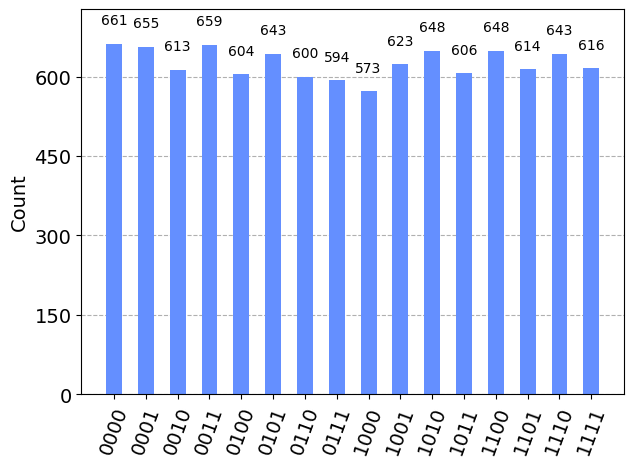

In [24]:
simulator = AerSimulator()
# simulator = Aer.get_backend('aer_simulator')
transpiled = transpile(new_qc, simulator)
result = simulator.run(transpiled, shots = 10000).result()
counts = result.get_counts(transpiled)
print(counts)
plot_histogram(counts)